In [6]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True
mpl.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
mpl.rcParams["font.size"] = 7.5

In [7]:
data = {}
for proj in ["JPetStore", "DayTrader", "AcmeAir", "Plants"]:
	with open(f"results/Mo2oM/Mo2oM_{proj}.json") as f:
		proj_data = json.load(f)
	df = pd.DataFrame(proj_data).drop(columns=["microservices"], axis=1)
	df = df.groupby(["alpha", "threshold"], as_index=False).median().drop(columns=["n_clusters"], axis=1)
	normalized_df = pd.DataFrame(MinMaxScaler().fit_transform(df.values), columns=df.columns)
	df['score'] = normalized_df["SM"] - normalized_df["ICP"] - normalized_df["IFN"] - normalized_df["NED"]
	data[proj] = df

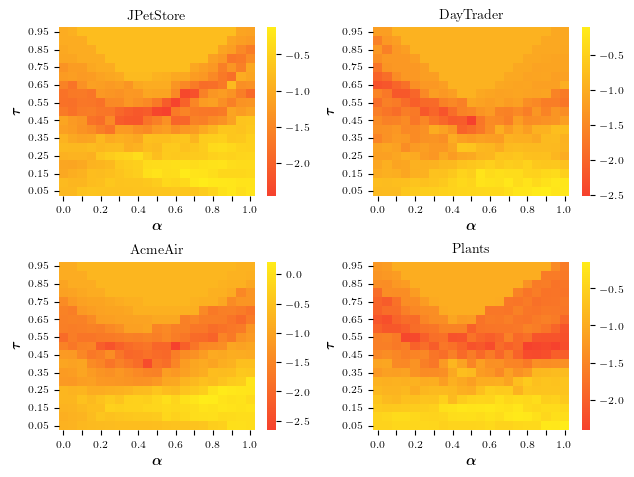

In [8]:
fig, axes = plt.subplots(2, 2)
for i, proj in enumerate(data):
	ax = axes[i // 2, i % 2]
	sns.heatmap(data[proj].pivot(index="threshold", columns="alpha", values="score"), 
				cmap=sns.color_palette("blend:#F6412D,#FFEC19", as_cmap=True), ax=ax)
	ax.invert_yaxis()
	ax.set_xlabel(r"$\boldsymbol{\alpha}$", fontsize=10)
	ax.set_ylabel(r"$\boldsymbol{\tau}$", fontsize=10)
	for label in ax.xaxis.get_ticklabels()[1::2]:
		label.set_visible(False)
	ax.set_title(proj, fontsize=10)
plt.tight_layout()
plt.show()
fig.savefig("heatmap_plots.pdf", format="pdf", bbox_inches="tight")